In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [310]:
os.listdir()

['70uW.asc', 'Br3_1000_30uW_0d.txt', 'br3_500_4K_100uW.txt']

In [307]:
os.chdir('..')

In [309]:
os.chdir(os.listdir()[-6])

In [311]:
df = pd.read_csv(os.listdir()[1], delim_whitespace=True, comment='#')
w = df.iloc[:,0]
c = df.iloc[:,1]

In [330]:
df2 = pd.read_csv(os.listdir()[0], delim_whitespace=True, comment='#')
w2 = df2.iloc[:,0]
c2 = df2.iloc[:,1]

In [331]:
df3 = pd.read_csv(os.listdir()[2], delim_whitespace=True, comment='#')
w3 = df3.iloc[:,0]
c3 = df3.iloc[:,1]

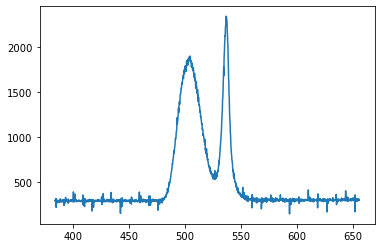

In [312]:
plt.plot(w2,c)

In [318]:
def lorentzian(x, a, x0,fwhm,c):
    gamma = fwhm / 2.0
    return a * gamma**2 / ((x - x0)**2 + gamma**2) +c

In [291]:
x_min = 490
x_max = 520
mask = (w > x_min) & (w < x_max)

In [292]:
p0 = [3000, 500, 30,0] 
params, _ = curve_fit(lorentzian, w[mask], c[mask], p0=p0)

In [293]:
print(params)

[2311.1034841   503.41764088   11.09179205]


In [294]:
c=c/max(c)

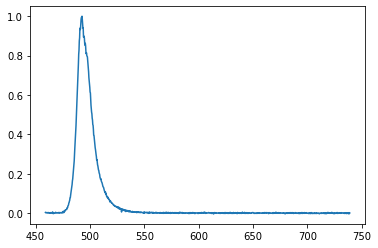

In [264]:
plt.plot(w,c)

Text(509, 0.05, '503nm')

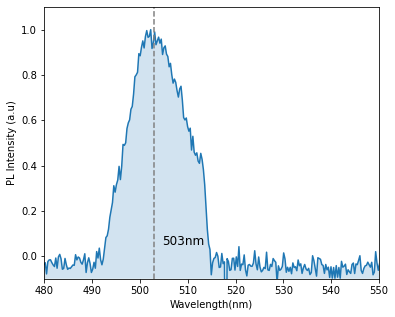

In [300]:
#nice plot no fit
fig, axs = plt.subplots(1, 1, figsize=(6,5))
axs.plot(w, c, label='spectrum')
axs.fill_between(w, -0.1, c, alpha=0.2)
axs.set_xlabel('Wavelength(nm)')
axs.set_ylabel('PL Intensity (a.u)')
axs.set_xlim(480,550)
axs.set_ylim(-0.1,max(c)+0.1)
axs.axvline(x=503, linestyle='--', color='grey')
axs.text(509, 0.05, '503nm', ha='center', fontsize=12)


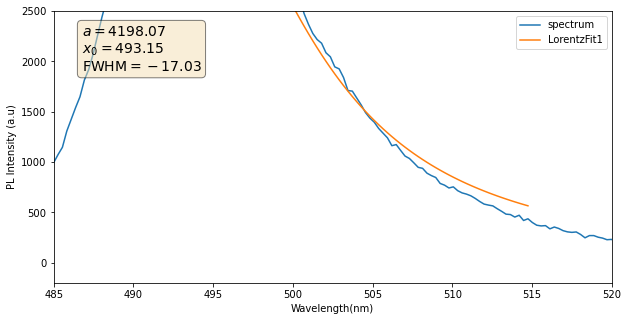

In [224]:
#plot with fit
fig, axs = plt.subplots(1, 1, figsize=(10,5))
axs.plot(w, c, label = 'spectrum')
axs.set_xlabel('Wavelength(nm)')
axs.set_ylabel('PL Intensity (a.u)')
axs.plot(w[mask], lorentzian(w[mask], *params), label='LorentzFit1')
#axs.plot(w[mask2], lorentzian(w[mask2], *params2), label='LorentzFit2', color = 'red')
#axs.set_title('Spectrum at 30uw with 200x 0.1s exposure time')
axs.legend(loc='upper right')
axs.set_xlim(485,520)
axs.set_ylim(-200,2500)
textstr = '\n'.join((
   r'$a=%.2f$' % (params[0],),
    r'$x_0=%.2f$' % (params[1],),
    r'FWHM$=%.2f$' % (-
                      params[2],)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(0.05, 0.95, textstr, transform=axs.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.show()

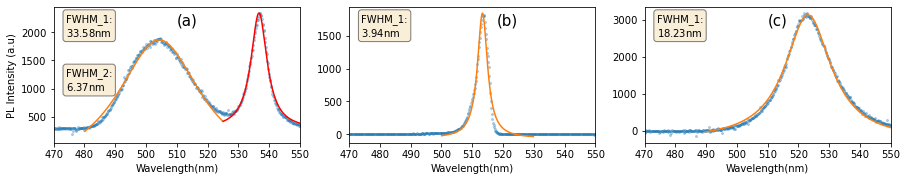

In [357]:
fig, (axs, axs2,axs3) = plt.subplots(1, 3, figsize=(15,2.5))



x_min = 480
x_max = 525
mask = (w > x_min) & (w < x_max)
p0 = [1000, 500, 30,0] 
params_1, _ = curve_fit(lorentzian, w[mask], c[mask], p0=p0)

x_min = 525
x_max = 550
mask2 = (w > x_min) & (w < x_max)
p0 = [1000, 500, 30,0] 
params_2, _ = curve_fit(lorentzian, w[mask2], c[mask2], p0=p0)


axs.plot(w, c,'o', label='spectrum', alpha=0.3,markersize=2)
axs.set_xlabel('Wavelength(nm)')
axs.set_ylabel('PL Intensity (a.u)')
axs.plot(w[mask], lorentzian(w[mask], *params_1), label='LorentzFit1')
axs.plot(w[mask2], lorentzian(w[mask2], *params_2), label='LorentzFit2', color='red')
#axs.legend(loc='upper center')
axs.set_xlim(470, 550)

# Add text boxes with the fit parameters
textstr1 = '\n'.join((
    r'FWHM_1:',
    r'$%.2f$nm' % (params_1[2],)))
textstr2 = '\n'.join((
    r'FWHM_2:',
    r'$%.2f$nm' % (-params_2[2],)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs.text(0.05, 0.95, textstr1, transform=axs.transAxes, fontsize=10, verticalalignment='top', bbox=props)
axs.text(0.05, 0.55, textstr2, transform=axs.transAxes, fontsize=10, verticalalignment='top', bbox=props)
axs.text(0.5, 0.95, '(a)', transform=axs.transAxes, fontsize=15, verticalalignment='top')

x_min = 500
x_max = 530
mask3 = (w2 > x_min) & (w2 < x_max)
p0 = [1000, 500, 30,0] 
params_3, _ = curve_fit(lorentzian, w2[mask3], c2[mask3], p0=p0)

axs2.plot(w2, c2,'o', label='spectrum', alpha=0.3,markersize=2)
axs2.set_xlabel('Wavelength(nm)')
#axs2.set_ylabel('PL Intensity (a.u)')
axs2.plot(w2[mask3], lorentzian(w2[mask3], *params_3), label='LorentzFit1')
axs2.set_xlim(470, 550)

textstr1 = '\n'.join((
    r'FWHM_1:',
    r'$%.2f$nm' % (params_3[2],)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs2.text(0.05, 0.95, textstr1, transform=axs2.transAxes, fontsize=10, verticalalignment='top', bbox=props)
axs2.text(0.6, 0.95, '(b)', transform=axs2.transAxes, fontsize=15, verticalalignment='top')

x_min = 490
x_max = 550
mask4 = (w3 > x_min) & (w3 < x_max)
p0 = [1000, 500, 30,0] 
params_4, _ = curve_fit(lorentzian, w3[mask4], c3[mask4], p0=p0)

axs3.plot(w3, c3,'o', label='spectrum', alpha=0.3,markersize=2)
axs3.set_xlabel('Wavelength(nm)')
#axs3.set_ylabel('PL Intensity (a.u)')
axs3.plot(w3[mask4], lorentzian(w3[mask4], *params_4), label='LorentzFit1')
axs3.set_xlim(470, 550)

textstr1 = '\n'.join((
    r'FWHM_1:',
    r'$%.2f$nm' % (-params_4[2],)))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
axs3.text(0.05, 0.95, textstr1, transform=axs3.transAxes, fontsize=10, verticalalignment='top', bbox=props)
axs3.text(0.5, 0.95, '(c)', transform=axs3.transAxes, fontsize=15, verticalalignment='top')

plt.show()


(470.0, 550.0)

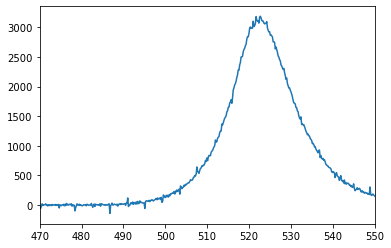

In [337]:
plt.plot(w3,c3)
plt.xlim(470,550)